In [197]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [198]:
#Read the data from 'data.csv' and dropna
dataset= pd.read_csv('data.csv')
dataset = dataset.dropna()
dataset

,PID,SCL,SCRamp,SCRfreq,HRmean,ACCmean,Energy,ZCR,VoiceProb,Hirability
0,P1,0.827077,0.094424,2.898792,73.276206,66.491987,0.005447,0.120261,0.403078,4
1,P2,5.183890,0.244549,5.219806,102.502828,65.031908,0.005782,0.074726,0.457309,5
3,P4,0.211715,0.008790,2.299042,80.258785,65.260810,0.006127,0.091186,0.437544,3
4,P5,0.082192,0.011505,1.299459,71.348170,66.607203,0.005081,0.076909,0.374498,4
5,P6,0.517391,0.029026,3.098709,67.658486,64.071636,0.004374,0.076218,0.423185,4
6,P7,4.811771,0.149931,6.972349,95.436294,65.195180,0.004903,0.052587,0.423719,5
7,P8,0.196216,0.035307,0.799667,52.604792,65.468119,0.003720,0.074693,0.456545,4
8,P9,0.342106,0.010594,1.099542,83.181398,63.967582,0.005858,0.114835,0.424477,4
9,P10,0.408798,0.042047,1.999167,62.833577,65.411525,0.006067,0.095510,0.548340,5
10,P11,1.388692,0.072733,5.097876,67.133943,66.474274,0.007599,0.097902,0.399308,5


Decision tree: Use a decision tree to estimate each interviewee’s hirability
score based on their physiological and vocal measures. Use a 3-fold cross-validation, according to which you will randomly assign each sample (i.e., participant) to one fold. Please collect the
estimated hirability score on the test data from each fold. After all folds are done, please report
the average absolute error across all folds. Experiment with 3-4 values of the tree depth and
report the results.
Note: All folds will not have the same number of samples.

In [300]:
#split the dataframe
x = dataset.values[:, 2:9]
y = dataset.values[:, 9]
y=y.astype('int')

#split the data
xtrain, xtest, ytrain, ytest =train_test_split(x, y, test_size = 0.3, random_state = 100)

#libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn import tree

#decision tree classifier- 3 fold cross validation 
depth = []
for i in range(1,4):
    clf = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 42, max_depth = i)
    print(clf)
    # Perform 3-fold cross validation
    scores = cross_val_score(estimator=clf, X=x, y=y, cv=3, n_jobs=5)
    depth.append((scores.mean()))
print("Scores: ", depth)

clf.fit(xtrain, ytrain)
y_pred = clf.predict(xtest)

#decision tree regressor
dtr = DecisionTreeRegressor(random_state=42, max_depth=1)
dtr.fit(xtrain, ytrain)
y_pred = dtr.predict(xtest)
mae = mean_absolute_error(ytest, y_pred)
print("Mean Absolute Error: {:.3f}".format(mae))


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_i

Decision tree visualization: Provide a plot of the root, nodes, and decision
boundaries of the best decision tree. Briefly discuss the resulting model.

[Text(111.60000000000001, 190.26, 'X[2] <= 67.234\nentropy = 1.5\nsamples = 8\nvalue = [2, 4, 2]'),
 Text(55.800000000000004, 135.9, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(167.4, 135.9, 'X[2] <= 76.767\nentropy = 0.918\nsamples = 6\nvalue = [2, 4, 0]'),
 Text(111.60000000000001, 81.53999999999999, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(223.20000000000002, 81.53999999999999, 'X[5] <= 0.103\nentropy = 0.918\nsamples = 3\nvalue = [2, 1, 0]'),
 Text(167.4, 27.180000000000007, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(279.0, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]')]

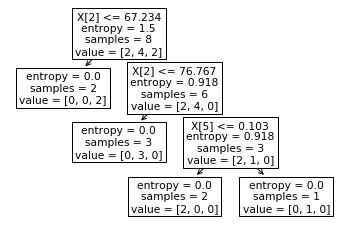

In [277]:
 tree.plot_tree(clf)

Random forest: Repeat the same task as in question (2) using a random
forest. Experiment with 3-4 different values of the number of trees. Compare and contrast the
performance of the decision tree with the random forest.

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
RandomForestClassifier(bootstra

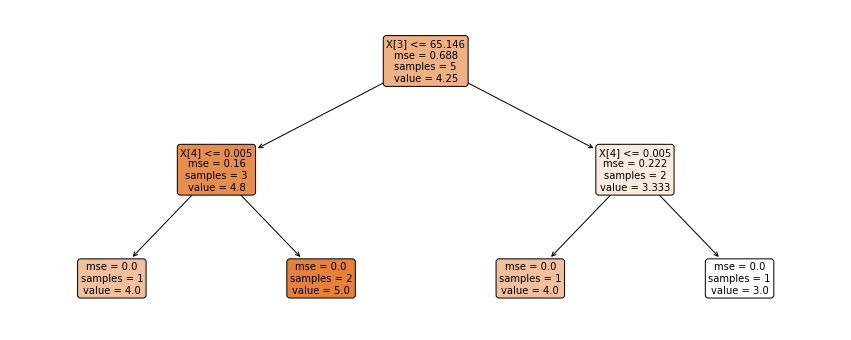

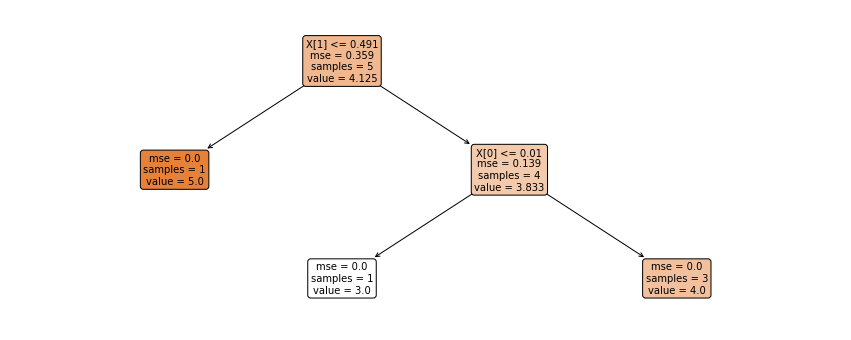

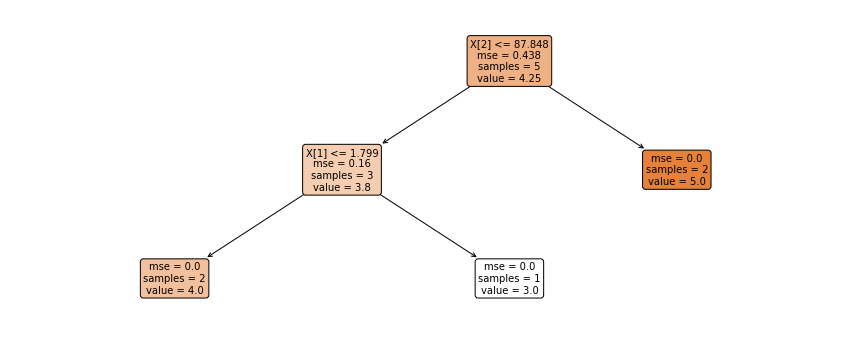

In [294]:
#Data preprocessing
x = dataset.values[:, 2:9]
y = dataset.values[:, 9]
y=y.astype('int')

#split the data
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size = 0.3, random_state = 42)

#Random forest classifier 
trees = [5, 10, 15]
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import mean_absolute_error

for i in trees: 
    rfc = RandomForestClassifier(n_estimators=i, max_depth=3,random_state=42)
    print(rfc)
    rfc.fit(x_train, y_train)
    y_pred = rfc.predict(x_test)
    #print(accuracy_score(y_test, y_pred))

first_tree = rfr.estimators_[0]
plt.figure(figsize=(15,6))
tree.plot_tree(first_tree,fontsize=10,filled=True, rounded=True)

second_tree = rfr.estimators_[1]
plt.figure(figsize=(15,6))
tree.plot_tree(second_tree,fontsize=10,filled=True, rounded=True)

third_tree = rfr.estimators_[2]
plt.figure(figsize=(15,6))
tree.plot_tree(third_tree,fontsize=10,filled=True, rounded=True)

#Random forest regressor
for i in trees:
    rfr = RandomForestRegressor(n_estimators= i, max_depth=3, random_state=42)

    rfr.fit(x_train, y_train)
    y_pred = rfr.predict(x_test)
    print(i, "Trees")
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
